# Distances between Observations

## Ames House Prices


In [2]:
# load dataset
# Data URL: https://datasci112.stanford.edu/data/housing.tsv

import pandas as pd
df = pd.read_table("data/housing.tsv")
df

,PID,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,1656,3,1,0,20,RL,141.0,31770,Pave,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,896,2,1,0,20,RH,80.0,11622,Pave,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,1329,3,1,1,20,RL,81.0,14267,Pave,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,2110,3,2,1,20,RL,93.0,11160,Pave,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,1629,3,2,1,60,RL,74.0,13830,Pave,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,1003,3,1,0,80,RL,37.0,7937,Pave,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,902,2,1,0,20,RL,NaN,8885,Pave,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,970,3,1,0,85,RL,62.0,10441,Pave,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,1389,2,1,0,20,RL,77.0,10010,Pave,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Square Footage and Bedrooms

We've seen how to visualize and summarize the relationship between two quantitative variables.

,Gr Liv Area,Bedroom AbvGr
Gr Liv Area,1.000000,0.516808
Bedroom AbvGr,0.516808,1.000000


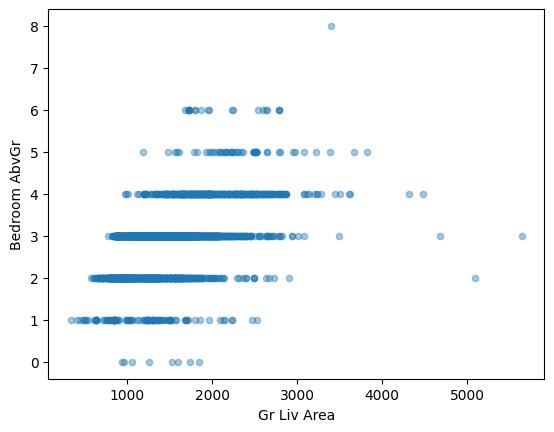

In [ ]:
# get correlation matrix and scatterplot
df.plot.scatter(x="Gr Liv Area", y="Bedroom AbvGr", alpha=0.4)
df[["Gr Liv Area", "Bedroom AbvGr"]].corr()

## Quantifying Similarity

How do we measure how "similar" two observations are?

For example, how would we quantify how similar the following two houses are?

## Calculating Distances

One way is to calculate the distance between the two points.

By the Pythagorean Theorem,

$$
d^2 = (x_1 - \acute{x_1})^2 + (x_2 - \acute{x_2})^2
$$

or equivanlently,

$$
d = \sqrt{(x_1 - \acute{x_1})^2 + (x_2 - \acute{x_2})^2}
$$

## Calculating Distance in Higher Dimensions

The distance fomula generalizes to any number of variables $m$.

$$
d\mathrm{(x,\acute{x})} = \sqrt{\sum_{j=1}^{m}(x_j - \acute{x_j})^2}
$$

Let's calculate the distance between these two houses, based on $m=4$ variables: square footage, bedrooms, full baths, and half baths.

## Distances between Obeservations

Let's define the relevant features and select the rows.

In [4]:
features = ["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]

df.loc[1707, features]

Gr Liv Area      2956
Bedroom AbvGr       5
Full Bath           2
Half Bath           1
Name: 1707, dtype: object

In [5]:
df.loc[290, features]

Gr Liv Area      2650
Bedroom AbvGr       6
Full Bath           3
Half Bath           0
Name: 290, dtype: object

Now we calculate the distance. Note that we import `numpy` for its square root function.

In [7]:
df.loc[2928, features]

Gr Liv Area      1389
Bedroom AbvGr       2
Full Bath           1
Half Bath           0
Name: 2928, dtype: object

In [8]:
import numpy as np
np.sqrt(
    np.sum(np.square(df.loc[1707, features] - df.loc[290, features]))
)

np.float64(306.00490192152154)

Which houses are most similar to house #1707?

Let's calculate the distance between every house in the data set and this one.

In [ ]:
# get differences from observation 1707
diffs = df[features] - df.loc[1707, features]
diffs

,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath
0,-1300,-2,-1,-1
1,-2060,-3,-1,-1
2,-1627,-2,-1,0
3,-846,-2,0,0
4,-1327,-2,0,0
...,...,...,...,...
2925,-1953,-2,-1,-1
2926,-2054,-3,-1,-1
2927,-1986,-2,-1,-1
2928,-1567,-3,-1,-1


In [ ]:
# get distance from observation 1707
dists = (diffs ** 2).sum(axis=1)
dists

0       1690006
1       4243611
2       2647134
3        715720
4       1760933
         ...   
2925    3814215
2926    4218927
2927    3944202
2928    2455500
2929     913940
Length: 2930, dtype: object

In [11]:
dists.sort_values()

1707          0
2336        126
1182        149
160         484
565        2405
         ...   
2880    6130597
907     6340342
1302    6497419
1901    6874902
1498    7214600
Length: 2930, dtype: object

Intuitively, it seems that house #160 is more similar to #1707 than #2336. Why did house #2336 have a smaller distance?

## The Importance of Scaling

The variation in square footage completely swamps the variation in the number of bedrooms.
We should bring all the variables to the same scale before calculating distance.

## Standardization

We’ve seen one way to bring different variables to the same scale: **standardization**.

$$
x_i \gets  \frac{x_i - \mathrm{\bar{x}}}{\mathrm{sd(x)}}
$$

In [ ]:
# Feature Scaling
df_standardized = ((df[features] - df[features].mean(axis='rows')) / df[features].std(axis='rows'))
df_standardized

,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath
0,0.309212,0.176064,-1.024618,-0.755074
1,-1.194223,-1.032058,-1.024618,-0.755074
2,-0.337661,0.176064,-1.024618,1.234464
3,1.207317,0.176064,0.783894,1.234464
4,0.255801,0.176064,0.783894,1.234464
...,...,...,...,...
2925,-0.982555,0.176064,-1.024618,-0.755074
2926,-1.182354,-1.032058,-1.024618,-0.755074
2927,-1.047836,0.176064,-1.024618,-0.755074
2928,-0.218968,-1.032058,-1.024618,-0.755074


## The Effect of Standardization

<Axes: xlabel='Gr Liv Area', ylabel='Bedroom AbvGr'>

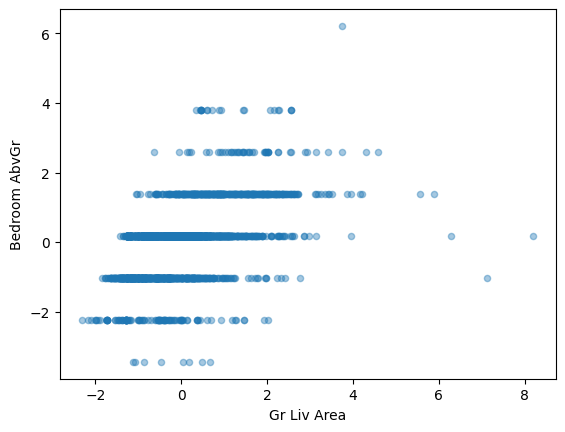

In [ ]:
# scatterplot of features before standardization
df_standardized.plot.scatter(x="Gr Liv Area", y="Bedroom AbvGr", alpha=0.4)

Standardization ensures that every variable has mean $0$ and standard deviation $1$ so that every variable is treated equally.

## Finding the Most Similar Home

Let’s find the most similar house by calculating distances on the _standardized_ data.

In [27]:
import numpy as np

# calculate standardized distances
diffs = df_standardized - df_standardized.loc[1707]
dists = np.sqrt((diffs ** 2).sum(axis='columns')).sort_values()
dists

1707    0.000000
160     0.043521
909     0.249254
585     0.625113
2592    0.625113
          ...   
2880    8.024014
1385    8.050646
2279    8.095655
158     8.225392
2723    8.313887
Length: 2930, dtype: float64

In [28]:
# find the most similar house
most_similar = dists.index[1]  # the first index is the observation itself
print(f"Now the most similar house to #1707 is #{most_similar}, which matches our intuition when we looked at the data.")

Now the most similar house to #1707 is #160, which matches our intuition when we looked at the data.


## Scaling in Scikit-Learn
The machine learning library Scikit-Learn can be used to scale variables and calculate distances.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# This calculates mean and standard deviation of each variable.
scaler.fit(df[features])

# This actually does the standardization
# The result is the standardized array (not DataFrame)
array_standardized = scaler.transform(df[features])
array_standardized

array([[ 0.30926506,  0.17609421, -1.02479289, -0.75520269],
       [-1.19442705, -1.03223376, -1.02479289, -0.75520269],
       [-0.33771825,  0.17609421, -1.02479289,  1.23467491],
       ...,
       [-1.04801492,  0.17609421, -1.02479289, -0.75520269],
       [-0.21900572, -1.03223376, -1.02479289, -0.75520269],
       [ 0.9898836 ,  0.17609421,  0.7840283 ,  1.23467491]],
      shape=(2930, 4))

## Calculating Distances in Scikit-Learn

Now let's calculate the distance between house #1707 and all houses, using Scikit-Learn.

In [36]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(array_standardized[[1707]], array_standardized)
dists

array([[4.43704819, 6.08145351, 4.41300228, ..., 5.33963844, 5.4757908 ,
        3.06886734]], shape=(1, 2930))

In [34]:
# sort the distances
dists[0].sort() # the sorting is done in-place
dists

array([[0.        , 0.04352793, 0.24929632, ..., 8.09703665, 8.22679607,
        8.31530563]], shape=(1, 2930))

In [38]:
#  We want to know which house had the smallest distance.
dists[0].argsort()

array([1707,  160,  909, ..., 2279,  158, 2723], shape=(2930,))

## The Distance Matrix

We can also calculate the distance between every pair of observations and store the result in a matrix.

In [39]:
# create the distance matrix using pairwise distances

dist_matrix = pairwise_distances(array_standardized)
dist_matrix

array([[0.        , 1.92902733, 2.09241494, ..., 1.35727998, 1.31875946,
        2.77393016],
       [1.92902733, 0.        , 2.48064897, ..., 1.21716597, 0.97542133,
        3.66915745],
       [2.09241494, 2.48064897, 0.        , ..., 2.11284979, 2.33104312,
        2.24373812],
       ...,
       [1.35727998, 1.21716597, 2.11284979, ..., 0.        , 1.4653712 ,
        3.37408911],
       [1.31875946, 0.97542133, 2.33104312, ..., 1.4653712 , 0.        ,
        3.1863642 ],
       [2.77393016, 3.66915745, 2.24373812, ..., 3.37408911, 3.1863642 ,
        0.        ]], shape=(2930, 2930))

In [40]:
# Note that row #1707 of this matrix contains the dists we calculated previously
dist_matrix[1707]

array([4.43704819, 6.08145351, 4.41300228, ..., 5.33963844, 5.4757908 ,
       3.06886734], shape=(2930,))

## Summary

To measure similarity between two observations, we calculate the distance between them.
We need to first make sure that all the variables are on the same scale.

**Scaling Variables**

- Standardization
  $$
  x_i \gets  \frac{x_i - \mathrm{\bar{x}}}{\mathrm{sd(x)}}
  $$
- Min-Max Scaling
  $$
  x_i \gets  \frac{x_i - \mathrm{min(x)}}{\mathrm{max(x) - min(x))}}
  $$

**Distance Matrix**

- Euclidean ($\ell_2$)
  $$
  \sqrt{\sum_{j=1}^{m}(x_j - \acute{x_j})^2}
  $$
- Manhattan ($\ell_1$)
  $$
  \sum_{j=1}^{m} |x_j - \acute{x_j}|
  $$